In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
# Load the data
data = pd.read_csv("Datasets/advertising.csv")

In [14]:
# Split the data into input features and target variable
X = data.iloc[:, 1:4].values
y = data.iloc[:, 4].values

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [17]:
# Evaluate the model using metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error:", mse)
print("R-squared:", r2)

Mean squared error: 3.174097353976104
R-squared: 0.899438024100912


In [18]:
# Predict the sales for a new tuple
new_data = np.array([[230.1, 37.8, 69.2]])
prediction = model.predict(new_data)
print("Predicted sales:", prediction[0])

Predicted sales: 20.613971470156297


# Employing Random Forest Regression with Grid Search to Hyper Parameter tuning

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
# Load the data
data = pd.read_csv("Datasets/Advertising.csv")

In [21]:
# Split the data into input features and target variable
X = data.iloc[:, 1:4].values
y = data.iloc[:, 4].values

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Create a Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42)

In [24]:
# Set up a grid of hyperparameters to search over
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [25]:
# Perform a grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]})

In [26]:
# Get the best hyperparameters and fit the model on the training data
best_params = grid_search.best_params_
best_rf_model = RandomForestRegressor(random_state=42, **best_params)
best_rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [27]:
# Make predictions on the testing data
y_pred = best_rf_model.predict(X_test)

In [28]:
# Evaluate the model using metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error:", mse)
print("R-squared:", r2)

Mean squared error: 0.5907322499999988
R-squared: 0.9812843792541843


In [29]:
# Predict the sales for a new tuple
new_data = np.array([[230.1, 37.8, 69.2]])
prediction = best_rf_model.predict(new_data)
print("Predicted sales:", prediction[0])

Predicted sales: 21.98799999999997


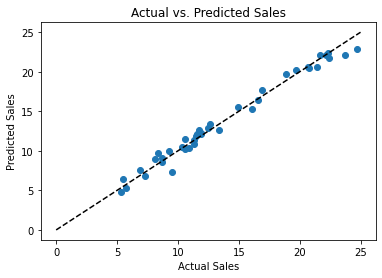

In [30]:
# Plot actual vs. predicted sales values on the test set
plt.scatter(y_test, y_pred)
plt.plot([0, 25], [0, 25], '--k')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()